<a href="https://colab.research.google.com/github/vageeshmaiya/GC-Former-Battery/blob/main/GC_former_Battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/GCformer-main
!ls

/content/drive/MyDrive/GCformer-main
checkpoints    exp     README.md	 result.txt	 test_results
data	       layers  requirements.txt  run_longExp.py  utils
data_provider  models  results		 scripts


In [11]:
pip install -r requirements.txt

In [4]:
!pip3 install --force einops==0.4.1

  Using cached einops-0.4.1-py3-none-any.whl (28 kB)
  Attempting uninstall: einops
    Found existing installation: einops 0.4.1
    Uninstalling einops-0.4.1:
      Successfully uninstalled einops-0.4.1


In [5]:
!pip install OmegaConf

In [12]:
!python -u run_longExp.py --model GCformer --data Battery --features M --freq t

Args in experiment:
Namespace(random_seed=2023, model='GCformer', data='Battery', root_path='./data/ETT/', data_path='dataset4.csv', features='M', target='Voltage', freq='t', checkpoints='./checkpoints/', context_len=96, seq_len=96, label_len=48, pred_len=96, fc_dropout=0.05, head_dropout=0.0, patch_len=16, stride=8, padding_patch='end', local_revin=0, affine=0, subtract_last=0, decomposition=0, kernel_size=25, individual=1, embed_type=0, enc_in=3, enc_raw=3, dec_in=3, c_out=3, d_model=128, n_heads=8, e_layers=3, global_layers=1, d_layers=1, d_ff=512, moving_avg=25, factor=1, distil=True, dropout=0.05, embed='timeF', activation='gelu', do_predict=False, h_token=512, h_channel=32, perturb_ratio=0, global_model='Gconv', norm_type='revin', weight_decay=0, local_bias=0.5, global_bias=0.5, atten_bias=0.5, TC_bias=1, num_workers=10, itr=3, train_epochs=100, batch_size=128, patience=100, learning_rate=0.0001, des='test', loss='mse', lradj='type3', pct_start=0.3, use_amp=False, use_gpu=True, g

In [ ]:
%cd /content/drive/MyDrive/GCformer-main/results/GCformer_Gconv_ETTh1_sl96_cl96_pl96_nchannel32_ntoken512_nhead8_d128_df512el3_dl1_attenBias0.5_TCbias1_dp0.05_Lbias0.5_Gbias0.5_revin_noise0_decay0_lr0.0001_decompose0_individual1
!ls

/content/drive/MyDrive/GCformer-main/results/GCformer_Gconv_ETTh1_sl96_cl96_pl96_nchannel32_ntoken512_nhead8_d128_df512el3_dl1_attenBias0.5_TCbias1_dp0.05_Lbias0.5_Gbias0.5_revin_noise0_decay0_lr0.0001_decompose0_individual1
metrics.npy  pred.npy  true.npy  x.npy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


preds = np.load('pred.npy')
trues = np.load('true.npy')

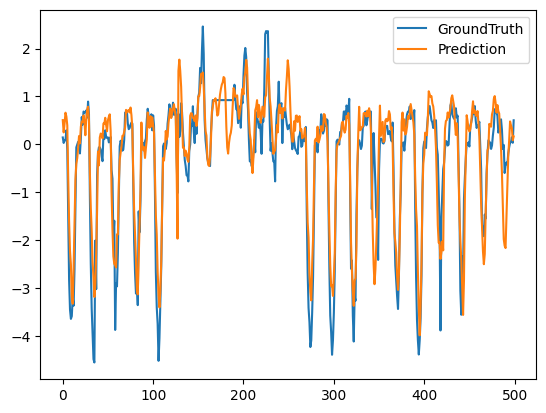

In [ ]:
plt.figure()
plt.plot(trues[:500,2,-1], label='GroundTruth')
plt.plot(preds[:500,2,-1], label='Prediction')
#plt.yticks([2.5,3,3.5,4,4.5,5])
plt.legend()
plt.show()